<a href="https://colab.research.google.com/github/sftSalman/pytorchFundamental/blob/main/CustomData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
from torch import nn 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


## Lest download the data if not exists 

In [2]:
import requests
import zipfile
from pathlib import Path



In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [4]:
import os 

In [ ]:
def walk_through(dir):
  for path , name , filename in os.walk(dir):
    print(path , name , filename )

In [ ]:
walk_through(image_path)

data/pizza_steak_sushi ['test', 'train'] []
data/pizza_steak_sushi/test ['pizza', 'sushi', 'steak'] []
data/pizza_steak_sushi/test/pizza [] ['2019408.jpg', '3092704.jpg', '195160.jpg', '2218680.jpg', '1925494.jpg', '2003290.jpg', '714866.jpg', '971934.jpg', '1687143.jpg', '2124579.jpg', '2236338.jpg', '648055.jpg', '1152100.jpg', '398345.jpg', '930553.jpg', '3475871.jpg', '2871261.jpg', '2508636.jpg', '2111981.jpg', '540882.jpg', '1503858.jpg', '344397.jpg', '194643.jpg', '309892.jpg', '416067.jpg']
data/pizza_steak_sushi/test/sushi [] ['2715127.jpg', '2741434.jpg', '1680893.jpg', '3806282.jpg', '343036.jpg', '2394442.jpg', '1245193.jpg', '3837522.jpg', '175783.jpg', '1172255.jpg', '719108.jpg', '1230335.jpg', '2540511.jpg', '858157.jpg', '499605.jpg', '207578.jpg', '3177743.jpg', '2521706.jpg', '2385731.jpg', '684266.jpg', '2276986.jpg', '1987407.jpg', '1742201.jpg', '1434806.jpg', '3196729.jpg', '2190404.jpg', '479711.jpg', '46797.jpg', '1600999.jpg', '887831.jpg', '988559.jpg']
data

In [6]:
train_dir = image_path/'train'
test_dir = image_path/'test'


In [7]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [8]:
test_dir

PosixPath('data/pizza_steak_sushi/test')

In [9]:
import random 
from PIL import Image

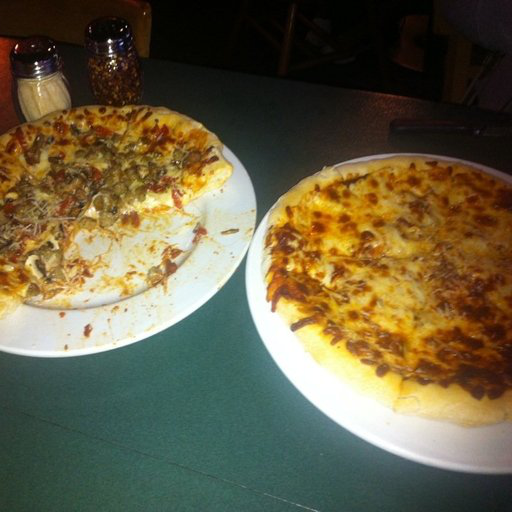

In [11]:
Image.open('/content/data/pizza_steak_sushi/train/pizza/1008844.jpg')


In [12]:
import numpy as np
import matplotlib.pyplot as plt


img_as_array = np.asarray('/content/data/pizza_steak_sushi/train/pizza/1008844.jpg')



In [14]:
import torch 
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms

In [16]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

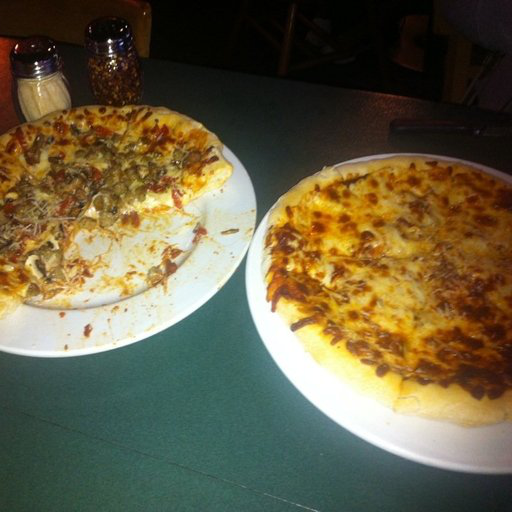

In [17]:
Image.open('/content/data/pizza_steak_sushi/train/pizza/1008844.jpg')

In [21]:
f = '/content/data/pizza_steak_sushi/train/pizza/1008844.jpg'

In [25]:
image_path = Path('/content/data/pizza_steak_sushi')

In [26]:
image_path_list = list(image_path.glob('*/*/*.jpg'))

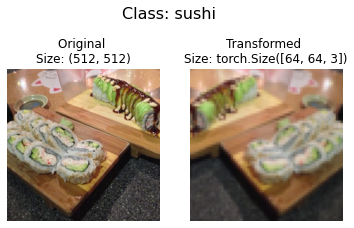

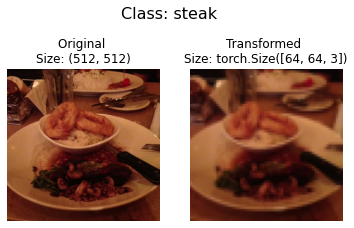

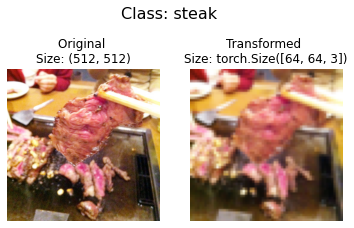

In [27]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [28]:
image_class = image_path_list.parents.stem

AttributeError: ignored

In [29]:
random_image_path = random.choice(image_path_list)

In [31]:
image_class = image_path_list.parent.stem


AttributeError: ignored

In [32]:
image_class = random_image_path.parent.stem


In [33]:
image_class

'steak'

In [34]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform= data_transform,
                                  target_transform=None)


In [35]:
test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform,
                                 )

In [36]:
class_names = train_data.classes

In [37]:
class_names

['pizza', 'steak', 'sushi']

In [38]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)

In [39]:
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers = 1,
                             shuffle = False)

In [40]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [41]:
train_data.classes

['pizza', 'steak', 'sushi']

In [42]:
from torch.utils.data import Dataset

In [ ]:
class ImageFolder_Custom(Dataset):
  def __init__(self,image_dir,transform = None):
    



  def __len__():




  def __getitem__():
